In [1]:
%matplotlib widget
from ipywidgets import *

import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi

def r_x(angle):
    r = np.eye(3)
    r[1:3,1:3] = np.array([[cos(angle), -sin(angle)],[sin(angle),cos(angle)]])
    return r
def r_y(angle):
    return np.array([
        [cos(angle),0,sin(angle)],
        [0,1,0],
        [-sin(angle),0,cos(angle)]])
    
def r_z(angle):
    r = np.eye(3)
    r[0:2,0:2] = np.array([[cos(angle), -sin(angle)],[sin(angle),cos(angle)]])
    return r
    

def euler_to_quaternion(roll,pitch,yaw):
    roll = roll/2
    pitch = pitch/2
    yaw = yaw/2
    
    q0 = cos(roll)*cos(pitch)*cos(yaw) + sin(roll)*sin(pitch)*sin(yaw)
    q1 = sin(roll)*cos(pitch)*cos(yaw) - cos(roll)*sin(pitch)*sin(yaw)
    q2 = cos(roll)*sin(pitch)*cos(yaw) + sin(roll)*cos(pitch)*sin(yaw)
    q3 = cos(roll)*cos(pitch)*sin(yaw) - sin(roll)*sin(pitch)*cos(yaw)
    return q0, q1, q2, q3

def quaternion_to_rotation(q0,q1,q2,q3):
    return np.array([[1-2*q2**2-2*q3**2, 2*q1*q2-2*q0*q3, 2*q1*q3+2*q0*q2]
                     ,[2*q1*q2+2*q0*q3, 1-2*q1**2-2*q3**2, 2*q2*q3-2*q0*q1]
                     ,[2*q1*q3-2*q0*q2, 2*q2*q3+2*q0*q1, 1-2*q1**2-2*q2**2]])
    
def inverse_rotation(rotation:np.ndarray):
    return rotation.T

def support_free_evaluation(d,nf,alpha):
    return d@nf + sin(alpha) >= 0

def euler_rotation(roll,pitch,yaw,x0,y0,z0):
    x = np.array([x0,y0,z0])
    return r_z(yaw)@r_y(pitch)@r_x(roll)@x
    

d_p = np.array([0,0,-1])
d_p = d_p /np.sqrt(d_p.T@d_p)



u = np.deg2rad(25)
v = np.deg2rad(180-15)
x = np.cos(u)* np.sin(v)
y = np.sin(u)* np.sin(v)
z = np.cos(v)

nf = np.array([x,y,z])
nf = nf / np.sqrt(nf.T@nf)

alpha = np.deg2rad(45)

roll_angle = np.linspace(0, pi,15)
pitch_angle = np.linspace(-pi, pi,50)
yaw_angle = np.linspace(-pi, pi,50)

x = []
y = []
z = []
xis = set()
yis = set()
zis = set()
for roll in roll_angle:
    for pitch in pitch_angle:
        for yaw in yaw_angle:
            q0,q1,q2,q3 = euler_to_quaternion(roll,pitch,yaw)
            r = quaternion_to_rotation(q0,q1,q2,q3)
            # r_inv = np.linalg.inv(r)
            r_inv = inverse_rotation(r)
            d = r_inv @ d_p
            if support_free_evaluation(d,nf,alpha):
                # raw = r@d_p
                # xi, yi, zi = euler_rotation(roll,pitch,yaw,*d_p)
                xi, yi, zi = r_inv @ nf
                x.append(xi)
                y.append(yi)
                z.append(zi)


In [2]:
x2 = np.array(x)
y2 = np.array(y)
z2 = np.array(z)

x_inds = np.argsort(np.unique(x2))
# x2 = x2[x_inds]
# y2 = y2[x_inds]
# z2 = z2[x_inds]

y_inds = np.argsort(y2)
# x2 = x2[y_inds]
# y2 = y2[y_inds]
# z2 = z2[y_inds]

# y2[0:15]

0.9995450006169058 0.999982500586966 0.9569894426662617


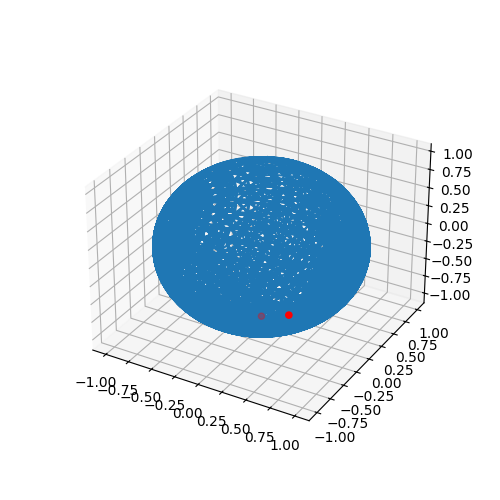

In [3]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

print(max(x),max(y),max(z))
# ax.plot_surface(X,Y,Z)
# ax.plot_surface(x,y,z)
# ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5)
ax.scatter3D([d_p[0],nf[0]],[d_p[1],nf[1]],[d_p[2],nf[2]], color="red")
ax.plot(x,y,z)
plt.show()

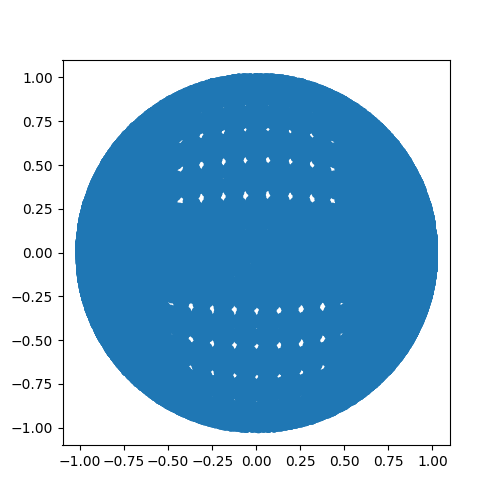

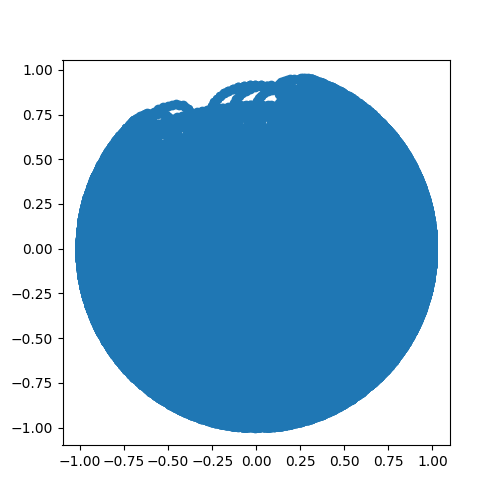

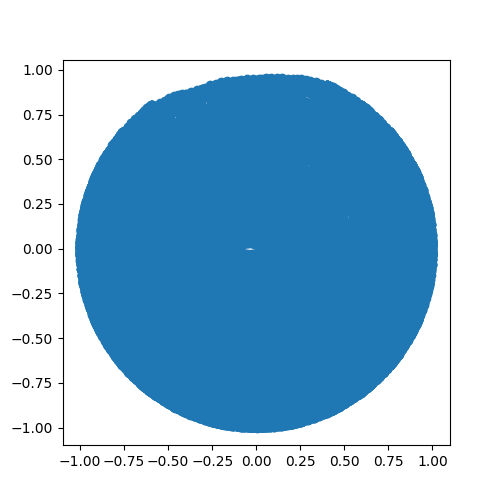

In [4]:
plt.close()
fig = plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.show()
fig = plt.figure(figsize=(5,5))
plt.scatter(x,z)
plt.show()
fig = plt.figure(figsize=(5,5))
plt.scatter(y,z)
plt.show()

(100, 100) (100, 100) (100, 100)


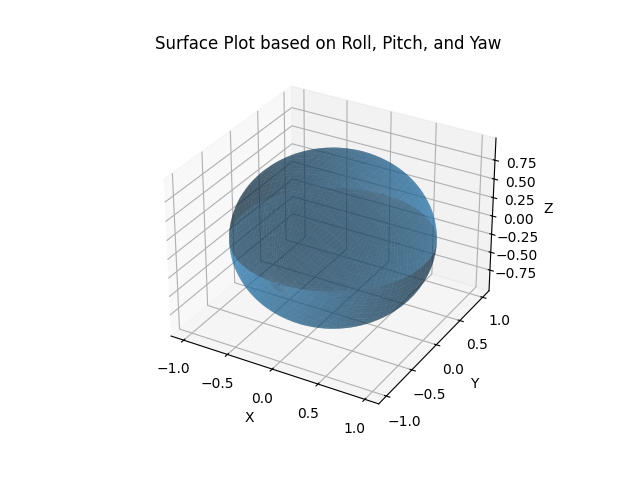

In [6]:
roll = np.linspace(-pi, pi, 100)  # Example roll values
pitch = np.linspace(-pi/2, pi/2, 100)     # Example pitch values
yaw = pi/2                         # Example yaw value

# Generate meshgrid for roll and pitch
roll_grid, pitch_grid = np.meshgrid(roll, pitch)

x = np.cos(yaw) * np.cos(roll_grid) + np.sin(yaw) * np.sin(roll_grid) * np.sin(pitch_grid)
y = -np.sin(yaw) * np.cos(roll_grid) + np.cos(yaw) * np.sin(roll_grid) * np.sin(pitch_grid)
z = np.sin(roll_grid) * np.cos(pitch_grid)


print(x.shape,y.shape,z.shape)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# ax.plot_surface(x, y, z, cmap='viridis', alpha=0.5)
ax.plot_surface(x, y, z, alpha=0.5)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot based on Roll, Pitch, and Yaw')

# Show plot
plt.show()

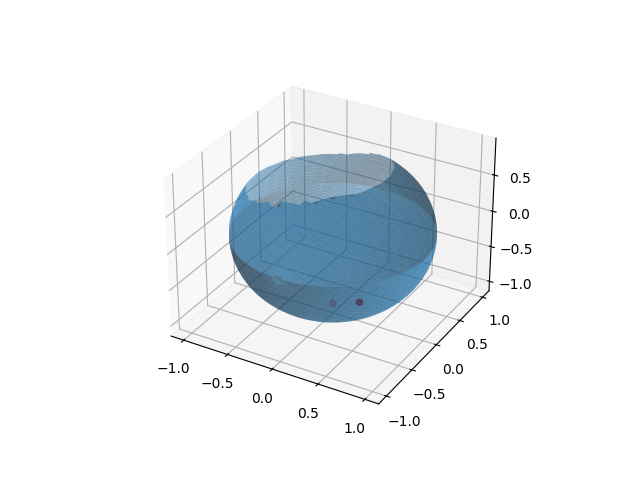

In [12]:
rolls = np.linspace(-pi, pi, 100)  # Example roll values
pitchs = np.linspace(-pi/2, pi/2, 100)     # Example pitch values
yaws = np.linspace(0,pi,100)

def get_xyz_from_euler_angle(roll,pitch,yaw):    
    x = np.cos(yaw) * np.cos(roll) + np.sin(yaw) * np.sin(roll) * np.sin(pitch)
    y = -np.sin(yaw) * np.cos(roll) + np.cos(yaw) * np.sin(roll) * np.sin(pitch)
    z = np.sin(roll) * np.cos(pitch)
    return x,y,z

roll_grid, pitch_grid = np.meshgrid(rolls, pitchs)

X = np.cos(yaw) * np.cos(roll_grid) + np.sin(yaw) * np.sin(roll_grid) * np.sin(pitch_grid)
Y = -np.sin(yaw) * np.cos(roll_grid) + np.cos(yaw) * np.sin(roll_grid) * np.sin(pitch_grid)
Z = np.sin(roll_grid) * np.cos(pitch_grid)

for i in range(rolls.shape[0]):
    for j in range(pitchs.shape[0]):    
        for yaw in yaws:
            q0,q1,q2,q3 = euler_to_quaternion(roll_grid[i][j],pitch_grid[i][j],yaw)
            r = quaternion_to_rotation(q0,q1,q2,q3)
            r_inv = inverse_rotation(r)
            d = r_inv @ d_p
            
            q0,q1,q2,q3 = euler_to_quaternion(roll_grid[i][j],pitch_grid[i][j],yaw)
        
            xi, yi, zi = r @ d_p   
            Z[i][j] = zi if support_free_evaluation(d,nf,alpha) else None
            if Z[i][j] is not None:
                X[i][j] = xi
                Y[i][j] = yi
                break
            else:
                X[i][j], Y[i][j], Z[i][j] = get_xyz_from_euler_angle(roll_grid[i][j],pitch_grid[i][j],yaw)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)       
ax.scatter3D([d_p[0],nf[0]],[d_p[1],nf[1]],[d_p[2],nf[2]], color="red")
plt.show()    

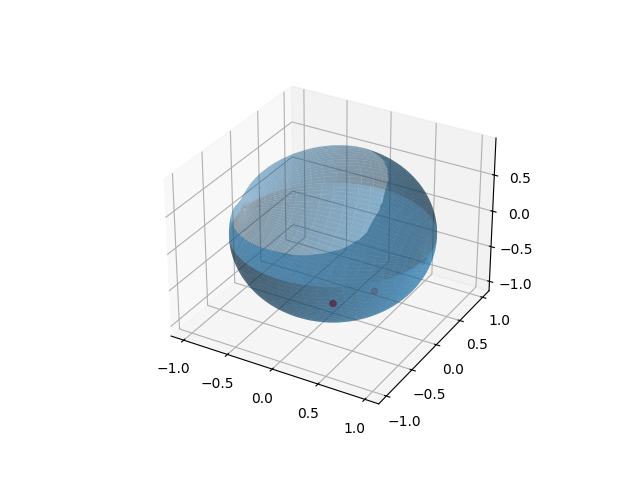

In [ ]:
u = np.deg2rad(45)
v = np.deg2rad(180-25)
x = np.cos(u)* np.sin(v)
y = np.sin(u)* np.sin(v)
z = np.cos(v)

nf = np.array([x,y,z])
nf = nf / np.sqrt(nf.T@nf)

alpha = np.deg2rad(35)

rolls = np.linspace(-pi, pi, 300)  # Example roll values
pitchs = np.linspace(-pi/2, pi/2, 300)     # Example pitch values

yaw = pi/2     

def get_xyz_from_euler_angle(roll,pitch,yaw):    
    x = np.cos(yaw) * np.cos(roll) + np.sin(yaw) * np.sin(roll) * np.sin(pitch)
    y = -np.sin(yaw) * np.cos(roll) + np.cos(yaw) * np.sin(roll) * np.sin(pitch)
    z = np.sin(roll) * np.cos(pitch)
    return x,y,z

roll_grid, pitch_grid = np.meshgrid(rolls, pitchs)

# X = np.zeros_like(roll_grid)
# Y = np.zeros_like(pitch_grid)
# Z = np.zeros_like(X)

X = np.cos(yaw) * np.cos(roll_grid) + np.sin(yaw) * np.sin(roll_grid) * np.sin(pitch_grid)
Y = -np.sin(yaw) * np.cos(roll_grid) + np.cos(yaw) * np.sin(roll_grid) * np.sin(pitch_grid)
Z = np.sin(roll_grid) * np.cos(pitch_grid)

for i in range(rolls.shape[0]):
    for j in range(pitchs.shape[0]):
        q0,q1,q2,q3 = euler_to_quaternion(roll_grid[i][j],pitch_grid[i][j],yaw)
        r = quaternion_to_rotation(q0,q1,q2,q3)
        r_inv = inverse_rotation(r)
        d = r_inv @ d_p
        xi, yi, zi = r @ d_p
        Z[i][j] = zi if support_free_evaluation(d,nf,alpha) else None
        X[i][j] = xi
        Y[i][j] = yi
                
                

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)       
ax.scatter3D([d_p[0],nf[0]],[d_p[1],nf[1]],[d_p[2],nf[2]], color="red")
plt.show()    